In [45]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [41]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
dataset_df = pd.read_csv("spotify-2023.csv",encoding='latin-1')
#Remove row 574 because data is not representative
dataset_df = dataset_df.drop(574,axis=0)
#Modify column streams to type int64
dataset_df['streams'] = dataset_df['streams'].astype('int64')
# Devide the stream values by 1,000,000 to express it in million
streams_mil=(dataset_df[['streams']]/1000000).round(2)
dataset_df['streams mil'] = streams_mil
# Sort the DataFrame in descending order by number of streams
streams_df=dataset_df.sort_values('streams',ascending=False)
# Create a new dataframe with the sample of the 100 most streamed songs in Spotify
top100_streams_df = streams_df.iloc[:100]

In [102]:
#Filter out songs that were realized before July 2015
top_100_one_year = top100_streams_df.loc[((top100_streams_df["released_year"] >= 2015) & (top100_streams_df["released_month"] >= 7)) | (top100_streams_df["released_year"] >= 2016)]

array([2019, 2017, 2018, 2016, 2021, 2020, 2022, 2015, 2023], dtype=int64)

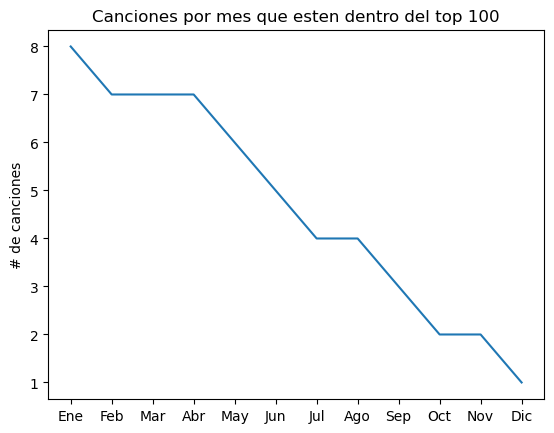

In [103]:
#Work data to better be represented in graph
songs_month = list(top_100_one_year["released_month"].value_counts(sort=True))
months = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'] 

#Line plot|
plt.title("Canciones por mes que esten dentro del top 100")
plt.ylabel("# de canciones")
plt.plot(months,songs_month)

<BarContainer object of 12 artists>

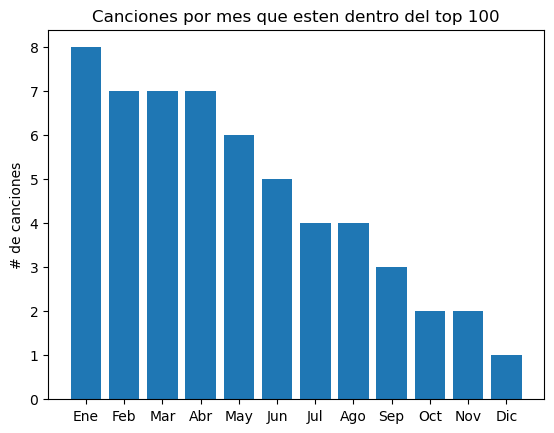

In [104]:
#Bar plot
plt.title("Canciones por mes que esten dentro del top 100")
plt.ylabel("# de canciones")
plt.bar(months,songs_month)


In [105]:
#Group songs depending on the season when it was released
spring = top_100_one_year.loc[((top_100_one_year["released_month"] == 3) & (top_100_one_year["released_day"] >= 20)) |(top_100_one_year["released_month"] == 4) | (top_100_one_year["released_month"] == 5) | ((top_100_one_year["released_month"] == 6) & (top_100_one_year["released_day"] < 21))]
summer = top_100_one_year.loc[((top_100_one_year["released_month"] == 6) & (top_100_one_year["released_day"] >= 21)) |(top_100_one_year["released_month"] == 7) | (top_100_one_year["released_month"] == 8) | ((top_100_one_year["released_month"] == 9) & (top_100_one_year["released_day"] < 23))]
fall = top_100_one_year.loc[((top_100_one_year["released_month"] == 9) & (top_100_one_year["released_day"] >= 23)) |(top_100_one_year["released_month"] == 10) | (top_100_one_year["released_month"] == 11) | ((top_100_one_year["released_month"] == 12) & (top_100_one_year["released_day"] < 21))]
winter = top_100_one_year.loc[((top_100_one_year["released_month"] == 12) & (top_100_one_year["released_day"] >= 21)) |(top_100_one_year["released_month"] == 1) | (top_100_one_year["released_month"] == 2) | ((top_100_one_year["released_month"] == 3) & (top_100_one_year["released_day"] < 20))]

#Count songs from each season
spring_total = len(spring)
summer_total = len(summer)
fall_total = len(fall)
winter_total = len(winter)

#Create a list with the sum of songs per season
season_list = [spring_total, summer_total, fall_total, winter_total]


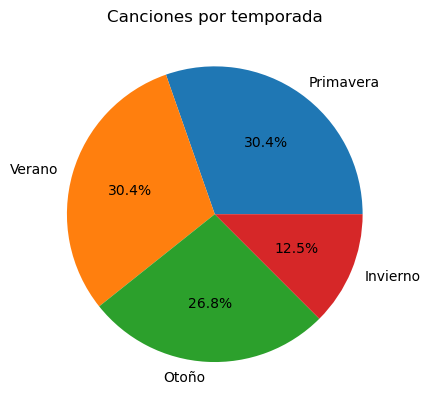

In [106]:
#Pie chart
labels = 'Primavera', 'Verano', 'Otoño', 'Invierno'
plt.title("Canciones por temporada")
pie_chart_season = plt.pie(season_list, labels=labels,autopct='%1.1f%%')

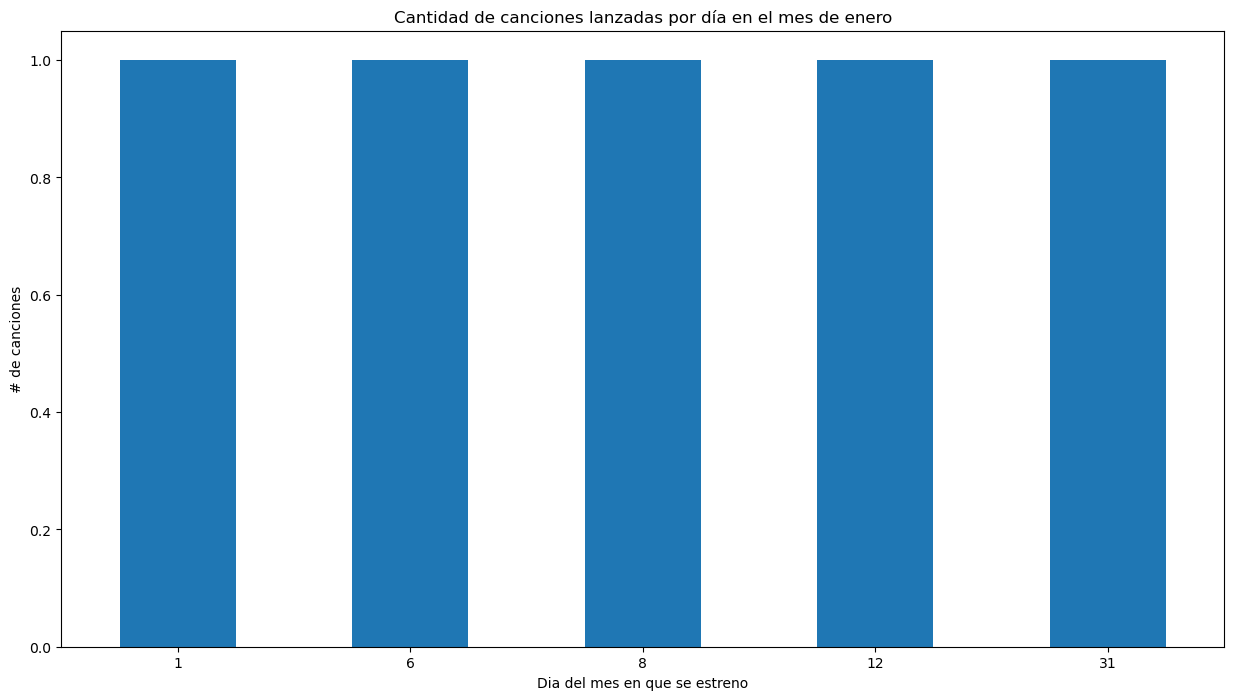

In [107]:
#Since January is the month with the most top song, check week of the month with the bigger number of songs in the top 100
jan_rele_top100 = top_100_one_year.loc[top_100_one_year['released_month'] == 1]
songs_jan = jan_rele_top100["released_day"].value_counts().sort_index().plot(kind='bar', ylabel='# de canciones', xlabel='Dia del mes en que se estreno',figsize=(15,8))
plt.title("Cantidad de canciones lanzadas por día en el mes de enero")
plt.xticks(rotation=0)
plt.show()